In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import accuracy_score

# import tensorflow as tf
# from tensorflow.keras.models import Sequential, Model, load_model 
# from tensorflow.keras.layers import Dense, Flatten, Input, concatenate, Conv2D, MaxPool2D, Dropout, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import SGD, Adam, RMSprop
# from tensorflow.keras.utils import to_categorical

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import pyperclip

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [3]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

In [4]:
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\MALGUNSL.ttf").get_name()
plt.rc("font",family=font_name)

# 워드 클라우드

## 떡볶이

In [5]:
tpk=pd.read_csv("../data/R03/떡볶이_R03.csv")
tpk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      2000 non-null   object 
 1   ID            2000 non-null   object 
 2   Post_num      2000 non-null   float64
 3   Followers     2000 non-null   float64
 4   Contents      2000 non-null   object 
 5   Tags          1817 non-null   object 
 6   Tags_sum      2000 non-null   int64  
 7   Tags_count    2000 non-null   int64  
 8   Tags_rate     2000 non-null   float64
 9   Likes         2000 non-null   int64  
 10  Scaled_likes  2000 non-null   float64
 11  Contents_len  2000 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 187.6+ KB


In [6]:
tpk["Tags"].fillna('0', inplace= True)

In [54]:
tpk["Tags"][0]

'#떡볶이, #현선이네, #현선이네떡볶이, #분식, #생맥주, #현선이네본점, #즉석떡볶이, #밀떡볶이, #떡볶이맛집, #튀김, #오뎅, #순대, #김밥, #현선이네용산본점, #서울, #서울맛집, #용산, #용산맛집, #용산역, #용산역맛집, #\x90母떱? #\x90母떱?용산, #\x90母떱?떡볶이'

In [23]:
Tag = []
for i in tpk["Tags"]:
    ex = i[0:-1].split(", ")
    for j in ex:
        Tag.append(j)
Tag

['#떡볶이',
 '#현선이네',
 '#현선이네떡볶이',
 '#분식',
 '#생맥주',
 '#현선이네본점',
 '#즉석떡볶이',
 '#밀떡볶이',
 '#떡볶이맛집',
 '#튀김',
 '#오뎅',
 '#순대',
 '#김밥',
 '#현선이네용산본점',
 '#서울',
 '#서울맛집',
 '#용산',
 '#용산맛집',
 '#용산역',
 '#용산역맛집',
 '#\x90母떱? #\x90母떱?용산',
 '#\x90母떱?떡볶',
 '#이수',
 '#애플하우스',
 '#무침만두',
 '#무침군만두',
 '#만두',
 '#양념만두',
 '#분식',
 '#분식맛집',
 '#분식집',
 '#떡볶이',
 '#즉석떡볶',
 '#바로그집',
 '#저장필수',
 '#대전데이트코스',
 '#바로그집',
 '#요미_대',
 '#수진분식수진분식은',
 '#떡볶이그',
 '#김말이',
 '#계란기본으로',
 '#\x82\x8b플_경기',
 '#\x82\x8b플_성남시',
 '#\x82\x8b플_수진',
 '#홍반장떡볶이',
 '#먹통령_신림',
 '#신림맛집',
 '#신림역맛집',
 '#서울대입구맛집',
 '#쌀떡볶이',
 '#떡볶이맛집',
 '#서울떡볶이맛집',
 '#포장마차떡볶이',
 '#분식맛집',
 '#가성비맛',
 '#까치네떡볶이',
 '#펫보이_인천',
 '#인천맛집',
 '#남동구맛집',
 '#인천데이트',
 '#구월동맛집',
 '#인천터미널맛집',
 '#인천터미널역맛집',
 '#구월맛집',
 '#구월데이트',
 '#구월로데오맛집',
 '#인천분식',
 '#인천분식집',
 '#인천김밥',
 '#떡볶이',
 '#김밥',
 '#인천핫플',
 '#떡볶이맛집',
 '#김밥맛집',
 '#foodporn',
 '#foodpic',
 '#치킨매니아',
 '#부산맛집',
 '#덕천맛집',
 '#덕천동맛집',
 '#부산떡볶이',
 '#부산떡볶이맛집',
 '#부산치킨맛집',
 '#부산치킨',
 '#치킨추천',
 '#치킨스타그램',
 '#배달음식',
 '#배달치킨',
 '#치킨맛집',
 '#떡볶이맛집'

In [8]:
from collections import Counter
tag_count = Counter(Tag)
tag_count

tag_tpk = tag_count.most_common()
tag_tpk

[('#떡볶이', 1459),
 ('#먹스타그램', 238),
 ('#떡볶이맛집', 186),
 ('', 183),
 ('#맛스타그램', 174),
 ('#분식', 172),
 ('#일상', 155),
 ('#맛집', 138),
 ('#순대', 131),
 ('#떡볶', 124),
 ('#집밥', 117),
 ('#먹팔', 101),
 ('#koreanfood', 99),
 ('#좋아요', 97),
 ('#튀김', 96),
 ('#먹방', 84),
 ('#소통', 83),
 ('#김밥', 82),
 ('#맞팔', 81),
 ('#먹스타', 80),
 ('#야식', 74),
 ('#mukbangasmr', 73),
 ('#asmrfood', 73),
 ('#eatingasmr', 72),
 ('#eatingsounds', 72),
 ('#food', 67),
 ('#떡볶이그램', 67),
 ('#떡볶이스타그램', 57),
 ('#점심', 57),
 ('#로제떡볶이', 57),
 ('#ㄸㅓㄱㅂㅗㄲㅇㅣ', 54),
 ('#국물떡볶이', 54),
 ('#홈쿡', 54),
 ('#데일리', 53),
 ('#치킨', 52),
 ('#??', 52),
 ('#간식', 50),
 ('#저녁메뉴', 50),
 ('#요리', 49),
 ('#tteokbokki', 49),
 ('#떡볶이추천', 49),
 ('#어묵', 48),
 ('#밀떡', 48),
 ('#좋아요반사', 47),
 ('#즉석떡볶이', 46),
 ('#오뎅', 46),
 ('#ㅁㅓㄱㅂㅏㅇ', 45),
 ('#저녁', 43),
 ('#떡볶이밀키트', 42),
 ('#koreanstreetfood', 42),
 ('#좋반', 41),
 ('#밀키트', 41),
 ('#요리스타그램', 41),
 ('#koreafood', 41),
 ('#라볶이', 40),
 ('#선팔', 39),
 ('#mukbang', 38),
 ('#asianfood', 38),
 ('#엽떡', 38),
 ('#asmr', 37),
 ('#mu

In [24]:
# 불용어 처리
token_ko = Tag
token_ko

stop_words = ["#떡볶이", '#맛스타그램','#먹스타그램','#떡볶이맛집','#떡볶','#일상','#맛집','#소통','#좋아요','#먹팔','#먹스타','#ㅁㅓㄱㅂㅏㅇ','#맞팔','#먹방','#ㄸㅓㄱㅂㅗㄲㅇㅣ']

token_ko = [each_word for each_word in token_ko if each_word not in stop_words]
hashtag = nltk.Text(token_ko)
tpk_tag = hashtag.vocab().most_common()

(-0.5, 299.5, 199.5, -0.5)

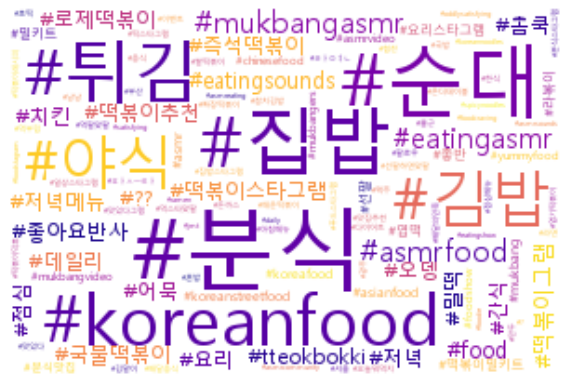

In [26]:
# 워드 클라우드 
wc_tpk1= WordCloud(max_font_size=50, background_color="white", max_words=700,
                    colormap = 'plasma', width=300,
                    font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(tpk_tag))

plt.figure(figsize=(10,10))
plt.imshow(wc_tpk1, interpolation="bilinear")
plt.axis("off")

## 치킨

In [69]:
ck=pd.read_csv("../data/R03/치킨_R03.csv")
ck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      2000 non-null   object 
 1   ID            2000 non-null   object 
 2   Post_num      2000 non-null   float64
 3   Followers     2000 non-null   float64
 4   Contents      2000 non-null   object 
 5   Tags          2000 non-null   object 
 6   Tags_sum      2000 non-null   int64  
 7   Tags_count    2000 non-null   int64  
 8   Tags_rate     2000 non-null   float64
 9   Likes         2000 non-null   int64  
 10  Scaled_likes  2000 non-null   float64
 11  Contents_len  2000 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 187.6+ KB


In [70]:
Tag = []
for i in ck["Tags"]:
    ex = i[0:-1].split(", ")
    for j in ex:
        Tag.append(j)
Tag


['#동근이숯불두마리치킨',
 '#동근이숯불두마리치킨',
 '#치킨',
 '#치킨맛집',
 '#배달치킨',
 '#배달맛집',
 '#숯불바베큐',
 '#치킨추천',
 '#복대동맛집',
 '#청주맛집',
 '#청주배달맛',
 '#치킨매니아',
 '#푸드갱_배달',
 '#배달맛집',
 '#치킨맛집',
 '#떡볶이맛집',
 '#배달음식추천',
 '#야식추천',
 '#치맥',
 '#치킨추',
 '',
 '',
 '#대구맛집',
 '#먹방',
 '#instafood',
 '#요리스타그램',
 '#요리',
 '#맛스타그램',
 '#먹스타그램',
 '#선팔',
 '#맞팔',
 '#선팔하면맞팔',
 '#선팔해요',
 '#followforfollow',
 '#맞팔해요',
 '#팔로우',
 '#팔로잉',
 '#팔로미',
 '#팔로워',
 '#데일리',
 '#팔로우미',
 '#소통',
 '#소통해요',
 '#셀피',
 '#카페스타그램',
 '#댓글',
 '#follow4like',
 '#좋아요반사',
 '#좋아요',
 '#like4lik',
 '#치킨맛집',
 '#떡볶이맛집',
 '#치킨추천',
 '#떡볶이추천',
 '#배달맛',
 '#네네치킨',
 '#네네치킨신상',
 '#신상마켓',
 '#쿠캣신상마켓',
 '#국물게티',
 '#로제게티',
 '#매콤게티',
 '#레드마블치킨',
 '#레드마블',
 '#치킨',
 '#치킨추천',
 '#스파게티',
 '#파스타',
 '#홈술',
 '#분식',
 '#야식',
 '#저메추',
 '#쿠캣',
 '#쿠캣마켓',
 '#신상리뷰',
 '#쿠캣매거진',
 '#쿠캣디',
 '#pasta',
 '#spaghetti',
 '#chicke',
 '#굽네치킨제',
 '#우뉴_배달',
 '#배달음식',
 '#배달맛집',
 '#고추바사삭',
 '#볼케이노',
 '#굽네치킨메',
 '#훌랄라치킨',
 '#훌랄라참숯바베큐치킨',
 '#훌랄라치킨',
 '#안산맛집',
 '#인천맛집',
 '#치킨맛집',
 '#숯불치킨',
 '#숯불바베큐',
 '#서산맛집',
 '

In [78]:
# from collections import Counter
# tag_count = Counter(Tag)
# tag_count

# tag_tpk = tag_count.most_common()
# tag_tpk

Counter({'#동근이숯불두마리치킨': 2,
         '#치킨': 1526,
         '#치킨맛집': 263,
         '#배달치킨': 8,
         '#배달맛집': 58,
         '#숯불바베큐': 9,
         '#치킨추천': 129,
         '#복대동맛집': 3,
         '#청주맛집': 8,
         '#청주배달맛': 1,
         '#치킨매니아': 6,
         '#푸드갱_배달': 1,
         '#떡볶이맛집': 13,
         '#배달음식추천': 8,
         '#야식추천': 31,
         '#치맥': 187,
         '#치킨추': 4,
         '': 220,
         '#대구맛집': 23,
         '#먹방': 214,
         '#instafood': 31,
         '#요리스타그램': 28,
         '#요리': 40,
         '#맛스타그램': 292,
         '#먹스타그램': 362,
         '#선팔': 71,
         '#맞팔': 170,
         '#선팔하면맞팔': 63,
         '#선팔해요': 1,
         '#followforfollow': 1,
         '#맞팔해요': 22,
         '#팔로우': 74,
         '#팔로잉': 4,
         '#팔로미': 4,
         '#팔로워': 17,
         '#데일리': 93,
         '#팔로우미': 5,
         '#소통': 124,
         '#소통해요': 14,
         '#셀피': 13,
         '#카페스타그램': 3,
         '#댓글': 4,
         '#follow4like': 1,
         '#좋아요반사': 90,
         '#좋아요': 205,

In [75]:
# 불용어 처리
token_ko = Tag
stop_words = ["#치킨", '#먹스타그램','#맛스타그램','#치킨맛집','#맛집','#좋아요','#먹스타','#먹방','#치킨추천','#치킨스타그램','#먹팔','#맞팔','#소통','#일상','#데일리','#치','#일상스타그램','#술스타그램',
             '#좋아요반사','#daily','#치킨먹방']

token_ko = [each_word for each_word in token_ko if each_word not in stop_words]
hashtag = nltk.Text(token_ko)
ck_tag = hashtag.vocab().most_common()

(-0.5, 299.5, 199.5, -0.5)

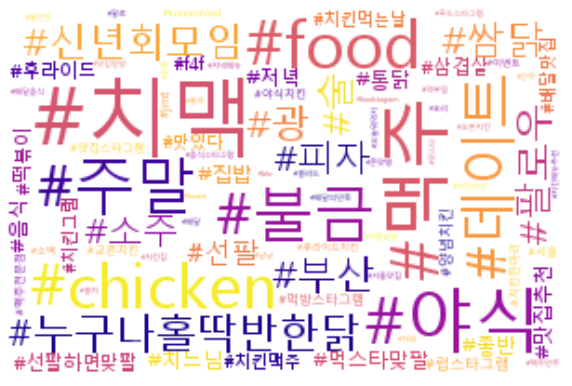

In [76]:
wc_ck1 = WordCloud(max_font_size=50, background_color="white", max_words=700, 
                   #stopwords=stopwords,
                     colormap = 'plasma', width=300,
                   font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(ck_tag))

plt.figure(figsize=(10,10))
plt.imshow(wc_ck1, interpolation="bilinear")
plt.axis("off")

# 빈도수 그래프

## 떡볶이

In [38]:
tpk=pd.read_csv("../data/R03/떡볶이_R03.csv")
tpk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      2000 non-null   object 
 1   ID            2000 non-null   object 
 2   Post_num      2000 non-null   float64
 3   Followers     2000 non-null   float64
 4   Contents      2000 non-null   object 
 5   Tags          1817 non-null   object 
 6   Tags_sum      2000 non-null   int64  
 7   Tags_count    2000 non-null   int64  
 8   Tags_rate     2000 non-null   float64
 9   Likes         2000 non-null   int64  
 10  Scaled_likes  2000 non-null   float64
 11  Contents_len  2000 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 187.6+ KB


In [39]:
tpk["Tags"].fillna('0', inplace= True)

In [40]:
Tag = []
for i in tpk["Tags"]:
    ex = i[0:-1].split(", ")
    for j in ex:
        Tag.append(j)
Tag

['#떡볶이',
 '#현선이네',
 '#현선이네떡볶이',
 '#분식',
 '#생맥주',
 '#현선이네본점',
 '#즉석떡볶이',
 '#밀떡볶이',
 '#떡볶이맛집',
 '#튀김',
 '#오뎅',
 '#순대',
 '#김밥',
 '#현선이네용산본점',
 '#서울',
 '#서울맛집',
 '#용산',
 '#용산맛집',
 '#용산역',
 '#용산역맛집',
 '#\x90母떱? #\x90母떱?용산',
 '#\x90母떱?떡볶',
 '#이수',
 '#애플하우스',
 '#무침만두',
 '#무침군만두',
 '#만두',
 '#양념만두',
 '#분식',
 '#분식맛집',
 '#분식집',
 '#떡볶이',
 '#즉석떡볶',
 '#바로그집',
 '#저장필수',
 '#대전데이트코스',
 '#바로그집',
 '#요미_대',
 '#수진분식수진분식은',
 '#떡볶이그',
 '#김말이',
 '#계란기본으로',
 '#\x82\x8b플_경기',
 '#\x82\x8b플_성남시',
 '#\x82\x8b플_수진',
 '#홍반장떡볶이',
 '#먹통령_신림',
 '#신림맛집',
 '#신림역맛집',
 '#서울대입구맛집',
 '#쌀떡볶이',
 '#떡볶이맛집',
 '#서울떡볶이맛집',
 '#포장마차떡볶이',
 '#분식맛집',
 '#가성비맛',
 '#까치네떡볶이',
 '#펫보이_인천',
 '#인천맛집',
 '#남동구맛집',
 '#인천데이트',
 '#구월동맛집',
 '#인천터미널맛집',
 '#인천터미널역맛집',
 '#구월맛집',
 '#구월데이트',
 '#구월로데오맛집',
 '#인천분식',
 '#인천분식집',
 '#인천김밥',
 '#떡볶이',
 '#김밥',
 '#인천핫플',
 '#떡볶이맛집',
 '#김밥맛집',
 '#foodporn',
 '#foodpic',
 '#치킨매니아',
 '#부산맛집',
 '#덕천맛집',
 '#덕천동맛집',
 '#부산떡볶이',
 '#부산떡볶이맛집',
 '#부산치킨맛집',
 '#부산치킨',
 '#치킨추천',
 '#치킨스타그램',
 '#배달음식',
 '#배달치킨',
 '#치킨맛집',
 '#떡볶이맛집'

In [41]:
from collections import Counter
tag_count = Counter(Tag)
tag_count

tag_tpk = tag_count.most_common()
tag_tpk

[('#떡볶이', 1459),
 ('#먹스타그램', 238),
 ('#떡볶이맛집', 186),
 ('', 183),
 ('#맛스타그램', 174),
 ('#분식', 172),
 ('#일상', 155),
 ('#맛집', 138),
 ('#순대', 131),
 ('#떡볶', 124),
 ('#집밥', 117),
 ('#먹팔', 101),
 ('#koreanfood', 99),
 ('#좋아요', 97),
 ('#튀김', 96),
 ('#먹방', 84),
 ('#소통', 83),
 ('#김밥', 82),
 ('#맞팔', 81),
 ('#먹스타', 80),
 ('#야식', 74),
 ('#mukbangasmr', 73),
 ('#asmrfood', 73),
 ('#eatingasmr', 72),
 ('#eatingsounds', 72),
 ('#food', 67),
 ('#떡볶이그램', 67),
 ('#떡볶이스타그램', 57),
 ('#점심', 57),
 ('#로제떡볶이', 57),
 ('#ㄸㅓㄱㅂㅗㄲㅇㅣ', 54),
 ('#국물떡볶이', 54),
 ('#홈쿡', 54),
 ('#데일리', 53),
 ('#치킨', 52),
 ('#??', 52),
 ('#간식', 50),
 ('#저녁메뉴', 50),
 ('#요리', 49),
 ('#tteokbokki', 49),
 ('#떡볶이추천', 49),
 ('#어묵', 48),
 ('#밀떡', 48),
 ('#좋아요반사', 47),
 ('#즉석떡볶이', 46),
 ('#오뎅', 46),
 ('#ㅁㅓㄱㅂㅏㅇ', 45),
 ('#저녁', 43),
 ('#떡볶이밀키트', 42),
 ('#koreanstreetfood', 42),
 ('#좋반', 41),
 ('#밀키트', 41),
 ('#요리스타그램', 41),
 ('#koreafood', 41),
 ('#라볶이', 40),
 ('#선팔', 39),
 ('#mukbang', 38),
 ('#asianfood', 38),
 ('#엽떡', 38),
 ('#asmr', 37),
 ('#mu

In [42]:
tpk= pd.DataFrame(tag_tpk)
tpk

,0,1
0,#떡볶이,1459
1,#먹스타그램,238
2,#떡볶이맛집,186
3,,183
4,#맛스타그램,174
...,...,...
9867,#잠실맛집,1
9868,#신림포차,1
9869,#잠실포차,1
9870,#구정연휴,1


In [43]:
tpk.drop(3, inplace=True)
tpk

,0,1
0,#떡볶이,1459
1,#먹스타그램,238
2,#떡볶이맛집,186
4,#맛스타그램,174
5,#분식,172
...,...,...
9867,#잠실맛집,1
9868,#신림포차,1
9869,#잠실포차,1
9870,#구정연휴,1


In [44]:
tpk.reset_index(inplace= True)
tpk.drop('index', inplace = True, axis=1)
tpk

,0,1
0,#떡볶이,1459
1,#먹스타그램,238
2,#떡볶이맛집,186
3,#맛스타그램,174
4,#분식,172
...,...,...
9866,#잠실맛집,1
9867,#신림포차,1
9868,#잠실포차,1
9869,#구정연휴,1


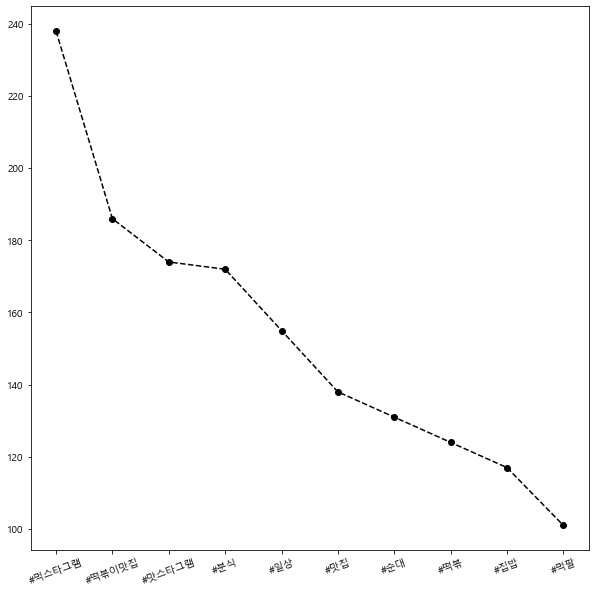

In [45]:
plt.figure(figsize = (10,10))
x=tpk.index[1:11]
y=tpk[1][1:11]

plt.xticks(x, labels=tpk[0][1:11], rotation = 20)

plt.plot(x,y,color = "black", linestyle = "dashed", marker = "o") 
# plt.plot(x,y, kind='bar') 

([<matplotlib.axis.XTick at 0x1e724de0a90>,
 [Text(0, 0, '#먹스타그램'),
  Text(1, 0, '#떡볶이맛집'),
  Text(2, 0, '#맛스타그램'),
  Text(3, 0, '#분식'),
  Text(4, 0, '#일상'),
  Text(5, 0, '#맛집'),
  Text(6, 0, '#순대'),
  Text(7, 0, '#떡볶'),
  Text(8, 0, '#집밥'),
  Text(9, 0, '#먹팔')])

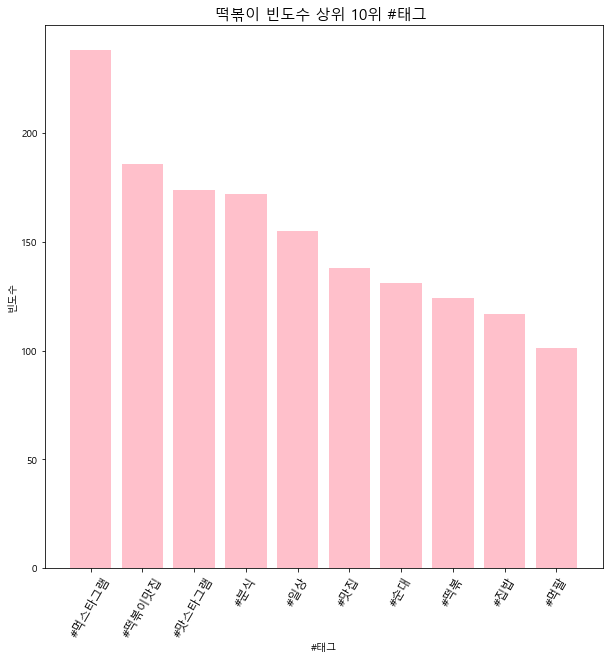

In [47]:
plt.figure(figsize = (10,10))
label = tpk[0][1:11]
index = np.arange(len(label))

plt.bar(index, tpk[1][1:11],
       color='pink')

plt.title('떡볶이 빈도수 상위 10위 #태그 ', fontsize=15)
plt.xlabel('#태그', fontsize=10)
plt.ylabel('빈도수', fontsize=10)
plt.xticks(index, label, rotation = 60, fontsize=12)

([<matplotlib.axis.YTick at 0x1e724e631c0>,
 [Text(0, 0, '#먹스타그램'),
  Text(0, 1, '#떡볶이맛집'),
  Text(0, 2, '#맛스타그램'),
  Text(0, 3, '#분식'),
  Text(0, 4, '#일상'),
  Text(0, 5, '#맛집'),
  Text(0, 6, '#순대'),
  Text(0, 7, '#떡볶'),
  Text(0, 8, '#집밥'),
  Text(0, 9, '#먹팔')])

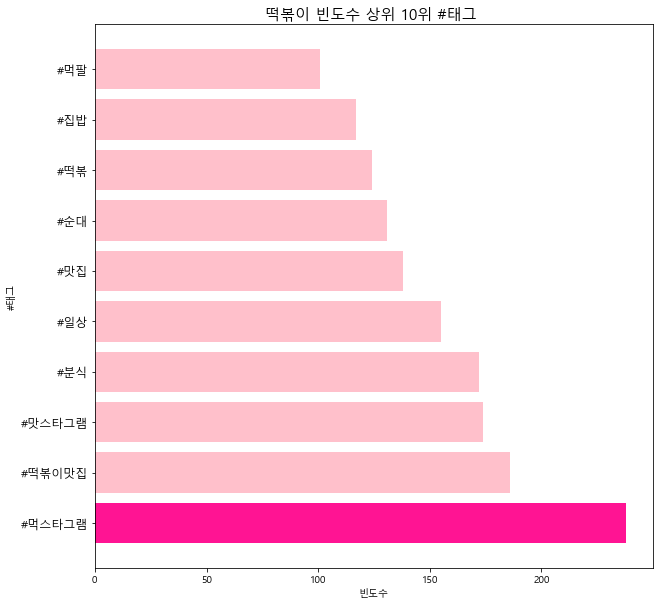

In [48]:

label = tpk[0][1:11]
index = np.arange(len(label))
colors = ['deeppink','pink','pink','pink','pink','pink','pink','pink','pink','pink']

plt.figure(figsize = (10,10))
plt.barh(index, tpk[1][1:11],
       color=colors)

plt.title('떡볶이 빈도수 상위 10위 #태그 ', fontsize=15)
plt.ylabel('#태그', fontsize=10)
plt.xlabel('빈도수', fontsize=10)
plt.yticks(index, label, fontsize=12)

## 치킨

In [49]:
ck=pd.read_csv("../data/R03/치킨_R03.csv")
ck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      2000 non-null   object 
 1   ID            2000 non-null   object 
 2   Post_num      2000 non-null   float64
 3   Followers     2000 non-null   float64
 4   Contents      2000 non-null   object 
 5   Tags          2000 non-null   object 
 6   Tags_sum      2000 non-null   int64  
 7   Tags_count    2000 non-null   int64  
 8   Tags_rate     2000 non-null   float64
 9   Likes         2000 non-null   int64  
 10  Scaled_likes  2000 non-null   float64
 11  Contents_len  2000 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 187.6+ KB


In [50]:
Tag = []
for i in ck["Tags"]:
    ex = i[0:-1].split(", ")
    for j in ex:
        Tag.append(j)
Tag

['#동근이숯불두마리치킨',
 '#동근이숯불두마리치킨',
 '#치킨',
 '#치킨맛집',
 '#배달치킨',
 '#배달맛집',
 '#숯불바베큐',
 '#치킨추천',
 '#복대동맛집',
 '#청주맛집',
 '#청주배달맛',
 '#치킨매니아',
 '#푸드갱_배달',
 '#배달맛집',
 '#치킨맛집',
 '#떡볶이맛집',
 '#배달음식추천',
 '#야식추천',
 '#치맥',
 '#치킨추',
 '',
 '',
 '#대구맛집',
 '#먹방',
 '#instafood',
 '#요리스타그램',
 '#요리',
 '#맛스타그램',
 '#먹스타그램',
 '#선팔',
 '#맞팔',
 '#선팔하면맞팔',
 '#선팔해요',
 '#followforfollow',
 '#맞팔해요',
 '#팔로우',
 '#팔로잉',
 '#팔로미',
 '#팔로워',
 '#데일리',
 '#팔로우미',
 '#소통',
 '#소통해요',
 '#셀피',
 '#카페스타그램',
 '#댓글',
 '#follow4like',
 '#좋아요반사',
 '#좋아요',
 '#like4lik',
 '#치킨맛집',
 '#떡볶이맛집',
 '#치킨추천',
 '#떡볶이추천',
 '#배달맛',
 '#네네치킨',
 '#네네치킨신상',
 '#신상마켓',
 '#쿠캣신상마켓',
 '#국물게티',
 '#로제게티',
 '#매콤게티',
 '#레드마블치킨',
 '#레드마블',
 '#치킨',
 '#치킨추천',
 '#스파게티',
 '#파스타',
 '#홈술',
 '#분식',
 '#야식',
 '#저메추',
 '#쿠캣',
 '#쿠캣마켓',
 '#신상리뷰',
 '#쿠캣매거진',
 '#쿠캣디',
 '#pasta',
 '#spaghetti',
 '#chicke',
 '#굽네치킨제',
 '#우뉴_배달',
 '#배달음식',
 '#배달맛집',
 '#고추바사삭',
 '#볼케이노',
 '#굽네치킨메',
 '#훌랄라치킨',
 '#훌랄라참숯바베큐치킨',
 '#훌랄라치킨',
 '#안산맛집',
 '#인천맛집',
 '#치킨맛집',
 '#숯불치킨',
 '#숯불바베큐',
 '#서산맛집',
 '

In [51]:
from collections import Counter
tag_count = Counter(Tag)
tag_count

tag_ck= tag_count.most_common()
tag_ck

[('#치킨', 1526),
 ('#먹스타그램', 362),
 ('#맛집', 293),
 ('#맛스타그램', 292),
 ('#치킨맛집', 263),
 ('#일상', 225),
 ('', 220),
 ('#먹방', 214),
 ('#좋아요', 205),
 ('#치맥', 187),
 ('#맞팔', 170),
 ('#먹스타', 160),
 ('#술스타그램', 138),
 ('#치', 137),
 ('#치킨추천', 129),
 ('#맥주', 126),
 ('#소통', 124),
 ('#먹팔', 119),
 ('#야식', 117),
 ('#치킨스타그램', 106),
 ('#food', 105),
 ('#데일리', 93),
 ('#일상스타그램', 93),
 ('#chicken', 92),
 ('#주말', 92),
 ('#좋아요반사', 90),
 ('#불금', 90),
 ('#daily', 83),
 ('#치킨먹방', 81),
 ('#데이트', 81),
 ('#누구나홀딱반한닭', 81),
 ('#신년회모임', 77),
 ('#쌈닭', 77),
 ('#광', 77),
 ('#술', 76),
 ('#팔로우', 74),
 ('#부산', 73),
 ('#피자', 73),
 ('#소주', 72),
 ('#선팔', 71),
 ('#먹스타맞팔', 70),
 ('#좋반', 69),
 ('#집밥', 68),
 ('#음식', 68),
 ('#통닭', 67),
 ('#맛집추천', 65),
 ('#치느님', 65),
 ('#저녁', 64),
 ('#선팔하면맞팔', 63),
 ('#삼겹살', 63),
 ('#떡볶이', 62),
 ('#후라이드', 62),
 ('#치킨먹는날', 62),
 ('#치킨맥주', 60),
 ('#맛있다', 59),
 ('#배달맛집', 58),
 ('#치킨그램', 56),
 ('#f4f', 55),
 ('#럽스타그램', 55),
 ('#양념치킨', 54),
 ('#먹방스타그램', 54),
 ('#jmt', 53),
 ('#맛집스타그램', 52),
 ('#교촌치킨', 52

In [56]:
ck= pd.DataFrame(tag_ck)
ck[1:11]

,0,1
1,#먹스타그램,362
2,#맛집,293
3,#맛스타그램,292
4,#치킨맛집,263
5,#일상,225
6,,220
7,#먹방,214
8,#좋아요,205
9,#치맥,187
10,#맞팔,170


In [57]:
ck.drop(6, inplace=True)
ck

,0,1
0,#치킨,1526
1,#먹스타그램,362
2,#맛집,293
3,#맛스타그램,292
4,#치킨맛집,263
...,...,...
9554,#별미지,1
9555,#혼치킨🍗,1
9556,#먹는거에진심인편,1
9557,#사랑해알러뷰쪽쪽,1


In [58]:
ck.reset_index(inplace= True)
ck.drop('index', inplace = True, axis=1)
ck

,0,1
0,#치킨,1526
1,#먹스타그램,362
2,#맛집,293
3,#맛스타그램,292
4,#치킨맛집,263
...,...,...
9553,#별미지,1
9554,#혼치킨🍗,1
9555,#먹는거에진심인편,1
9556,#사랑해알러뷰쪽쪽,1


([<matplotlib.axis.XTick at 0x1e724ed3400>,
 [Text(0, 0, '#먹스타그램'),
  Text(1, 0, '#맛집'),
  Text(2, 0, '#맛스타그램'),
  Text(3, 0, '#치킨맛집'),
  Text(4, 0, '#일상'),
  Text(5, 0, '#먹방'),
  Text(6, 0, '#좋아요'),
  Text(7, 0, '#치맥'),
  Text(8, 0, '#맞팔'),
  Text(9, 0, '#먹스타')])

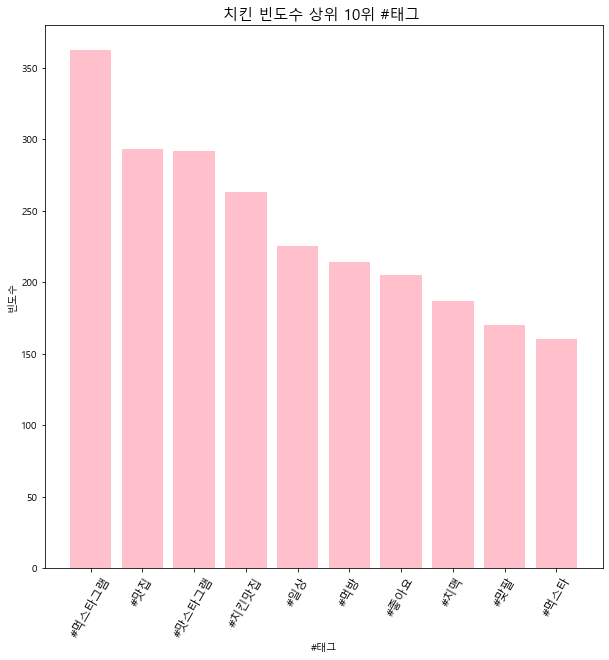

In [59]:
plt.figure(figsize = (10,10))
label = ck[0][1:11]
index = np.arange(len(label))

plt.bar(index, ck[1][1:11],
       color='pink')

plt.title('치킨 빈도수 상위 10위 #태그 ', fontsize=15)
plt.xlabel('#태그', fontsize=10)
plt.ylabel('빈도수', fontsize=10)
plt.xticks(index, label, rotation = 60, fontsize=12)

([<matplotlib.axis.YTick at 0x1e725950a90>,
 [Text(0, 0, '#먹스타그램'),
  Text(0, 1, '#맛집'),
  Text(0, 2, '#맛스타그램'),
  Text(0, 3, '#치킨맛집'),
  Text(0, 4, '#일상'),
  Text(0, 5, '#먹방'),
  Text(0, 6, '#좋아요'),
  Text(0, 7, '#치맥'),
  Text(0, 8, '#맞팔'),
  Text(0, 9, '#먹스타')])

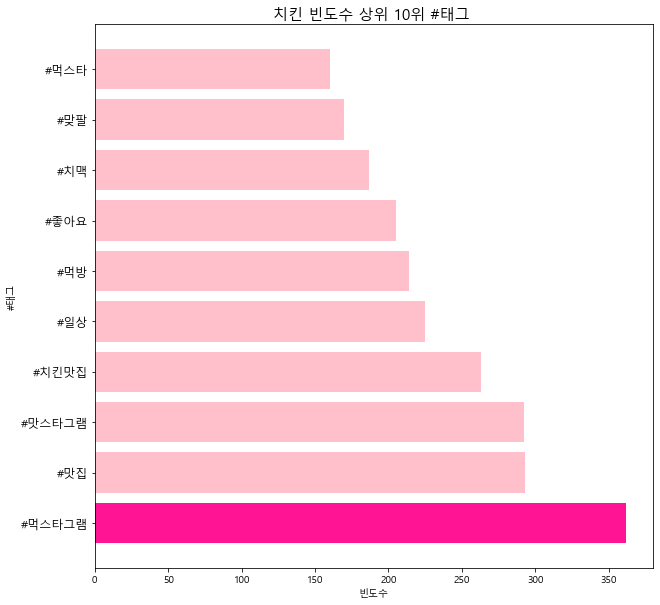

In [60]:

label = ck[0][1:11]
index = np.arange(len(label))
colors = ['deeppink','pink','pink','pink','pink','pink','pink','pink','pink','pink']

plt.figure(figsize = (10,10))
plt.barh(index, ck[1][1:11],
       color=colors)

plt.title('치킨 빈도수 상위 10위 #태그 ', fontsize=15)
plt.ylabel('#태그', fontsize=10)
plt.xlabel('빈도수', fontsize=10)
plt.yticks(index, label, fontsize=12)

# 전체 종합

In [61]:
result=pd.read_csv("../data/result3.csv")
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13330 entries, 0 to 13329
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      13330 non-null  object 
 1   ID            13330 non-null  object 
 2   Post_num      13330 non-null  object 
 3   Followers     13330 non-null  object 
 4   Contents      13330 non-null  object 
 5   Tags          12042 non-null  object 
 6   Tags_sum      13330 non-null  int64  
 7   Tags_count    13330 non-null  int64  
 8   Tags_rate     13330 non-null  float64
 9   Likes         13330 non-null  int64  
 10  Scaled_likes  13330 non-null  float64
 11  Contents_len  13330 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.2+ MB


In [62]:
result["Tags"].fillna('0', inplace= True)
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13330 entries, 0 to 13329
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      13330 non-null  object 
 1   ID            13330 non-null  object 
 2   Post_num      13330 non-null  object 
 3   Followers     13330 non-null  object 
 4   Contents      13330 non-null  object 
 5   Tags          13330 non-null  object 
 6   Tags_sum      13330 non-null  int64  
 7   Tags_count    13330 non-null  int64  
 8   Tags_rate     13330 non-null  float64
 9   Likes         13330 non-null  int64  
 10  Scaled_likes  13330 non-null  float64
 11  Contents_len  13330 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.2+ MB


In [63]:
tag = []
for i in result["Tags"]:
    ex = i[0:-1].split(", ")
    for j in ex:
        tag.append(j)
tag

['#돈까스의집',
 '#돈까스맛집',
 '#송파맛집',
 '#삼전역맛집',
 '#빵맛집',
 '#돈까',
 '#건대',
 '#성수완당깔끔한',
 '#투어_건',
 '#사장님돈까스',
 '#먹통령_이대',
 '#이대맛집',
 '#이화여대맛집',
 '#고치돈맛집',
 '#돈까스맛집',
 '#치즈돈까스',
 '#고구마돈까',
 '#북천',
 '#북천돈까스🔱11:00~19:30',
 '#푸세이돈_용산',
 '#용산맛집',
 '#용산역맛집',
 '#신용산맛집',
 '#삼각지맛집',
 '#삼각지역맛집',
 '#신용산역맛집',
 '#이촌역맛집',
 '#이촌맛집',
 '#돈까스',
 '#돈까스맛집',
 '#돈까스맛집추천',
 '#서울돈까스',
 '#경양식돈까스',
 '#foodpics',
 '#foodpor',
 '#치즈돈까스',
 '#집에서만들기',
 '#키마카레',
 '#미니돈까스',
 '#사평카레',
 '#저수분카레',
 '#코스트코모짜렐라치즈',
 '#수제돈까스',
 '#집밥스타그램',
 '#집밥',
 '#홈쿡스타그램',
 '#요리그램',
 '#요리하는여자',
 '#먹스타그램🍴',
 '#맛스타',
 '#먹팔',
 '#foods',
 '#koreanfood',
 '#돈까',
 '#안양',
 '#범계',
 '#유미카츠',
 '#떡볶카츠',
 '#돈까스맛집',
 '#미로_범계',
 '#미로_안양',
 '#돈카츠맛집',
 '#돈카츠',
 '#돈까스',
 '#떡볶이맛집',
 '#떡볶이돈까스',
 '#범계맛집',
 '#범계역맛집',
 '#범계로데오',
 '#범계맛집추천',
 '#안양맛집',
 '#안산맛집',
 '#범계',
 '#첫줄원',
 '#돈까스의집첫',
 '#푸썸_송',
 '#명동돈가스',
 '#명동돈까스',
 '#돈까스',
 '#돈카츠'

In [64]:
from collections import Counter
tag_count = Counter(tag)
tag_count

tag_all= tag_count.most_common()
tag_all

[('#피자', 2051),
 ('#치킨', 1687),
 ('#떡볶이', 1602),
 ('#먹스타그램', 1598),
 ('#스시', 1541),
 ('', 1508),
 ('#돈까스', 1459),
 ('#햄버거', 1262),
 ('#맛집', 1260),
 ('#파스타', 1241),
 ('#일상', 1209),
 ('#맛스타그램', 1133),
 ('#초밥', 858),
 ('#소통', 682),
 ('#먹방', 676),
 ('#맞팔', 663),
 ('#좋아요', 614),
 ('#먹스타', 526),
 ('#먹팔', 493),
 ('#혜화역맛집', 483),
 ('#좋아요반사', 460),
 ('#집밥', 459),
 ('#food', 459),
 ('#일상스타그램', 458),
 ('#데일리', 428),
 ('#좋반', 406),
 ('#서울맛집', 370),
 ('#초밥맛집', 360),
 ('#맛집추천', 353),
 ('#수제버거', 340),
 ('#점심', 333),
 ('#음식', 333),
 ('#맛집스타그램', 324),
 ('#foodstagram', 321),
 ('#스테이크', 320),
 ('#선팔하면맞팔', 303),
 ('#instafood', 298),
 ('#선팔', 295),
 ('#샐러드', 293),
 ('#일상그램', 292),
 ('#파스타맛집', 292),
 ('#일식', 285),
 ('#오늘뭐먹지', 285),
 ('#치킨맛집', 284),
 ('#야식', 282),
 ('#사시미', 277),
 ('#댓글소통', 277),
 ('#daily', 266),
 ('#맞팔은댓', 253),
 ('#일상생활', 253),
 ('#돈까스맛집', 250),
 ('#술스타그램', 247),
 ('#대학로맛집', 247),
 ('#오마카세', 247),
 ('#먹스타맞팔', 244),
 ('#저녁', 244),
 ('#sushi', 241),
 ('#대학로카페', 241),
 ('#대학로초밥', 240),
 ('

In [65]:
alltag= pd.DataFrame(tag_all)
alltop=alltag[:31]


In [66]:
alltop.drop([0,1,2,4,5,6,7,9], inplace=True)
alltop

C:\Users\user\AppData\Local\Temp\ipykernel_7372\389734963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alltop.drop([0,1,2,4,5,6,7,9], inplace=True)


,0,1
3,#먹스타그램,1598
8,#맛집,1260
10,#일상,1209
11,#맛스타그램,1133
12,#초밥,858
13,#소통,682
14,#먹방,676
15,#맞팔,663
16,#좋아요,614
17,#먹스타,526


In [67]:
alltop.reset_index(inplace= True)
alltop.drop('index', inplace = True, axis=1)
alltop

C:\Users\user\AppData\Local\Temp\ipykernel_7372\2584338131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alltop.drop('index', inplace = True, axis=1)


,0,1
0,#먹스타그램,1598
1,#맛집,1260
2,#일상,1209
3,#맛스타그램,1133
4,#초밥,858
5,#소통,682
6,#먹방,676
7,#맞팔,663
8,#좋아요,614
9,#먹스타,526


([<matplotlib.axis.YTick at 0x1e7278c6ac0>,
 [Text(0, 0, '#먹스타그램'),
  Text(0, 1, '#맛집'),
  Text(0, 2, '#일상'),
  Text(0, 3, '#맛스타그램'),
  Text(0, 4, '#초밥'),
  Text(0, 5, '#소통'),
  Text(0, 6, '#먹방'),
  Text(0, 7, '#맞팔'),
  Text(0, 8, '#좋아요'),
  Text(0, 9, '#먹스타')])

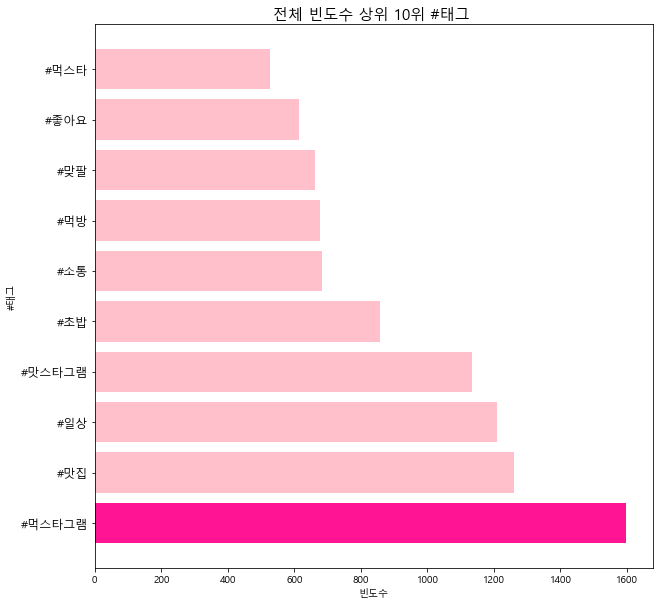

In [68]:
label = alltop[0][0:10]
index = np.arange(len(label))
colors = ['deeppink','pink','pink','pink','pink','pink','pink','pink','pink','pink']

plt.figure(figsize = (10,10))
plt.barh(index, alltop[1][0:10],
       color=colors)

plt.title('전체 빈도수 상위 10위 #태그 ', fontsize=15)
plt.ylabel('#태그', fontsize=10)
plt.xlabel('빈도수', fontsize=10)
plt.yticks(index, label, fontsize=12)

In [130]:
food = alltag[:10]
food.drop([3,5,8], inplace= True)
food

C:\Users\user\AppData\Local\Temp\ipykernel_13032\2880067726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food.drop([3,5,8], inplace= True)


,0,1
0,#피자,2051
1,#치킨,1687
2,#떡볶이,1602
4,#스시,1541
6,#돈까스,1459
7,#햄버거,1262
9,#파스타,1241


In [131]:
# food.reset_index(inplace= True)
# food.drop('index', inplace = True, axis=1)


C:\Users\user\AppData\Local\Temp\ipykernel_13032\2068065298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food.drop('index', inplace = True, axis=1)


([<matplotlib.axis.XTick at 0x2d3ff744d90>,
 [Text(0, 0, '#피자'),
  Text(1, 0, '#치킨'),
  Text(2, 0, '#떡볶이'),
  Text(3, 0, '#스시'),
  Text(4, 0, '#돈까스'),
  Text(5, 0, '#햄버거'),
  Text(6, 0, '#파스타')])

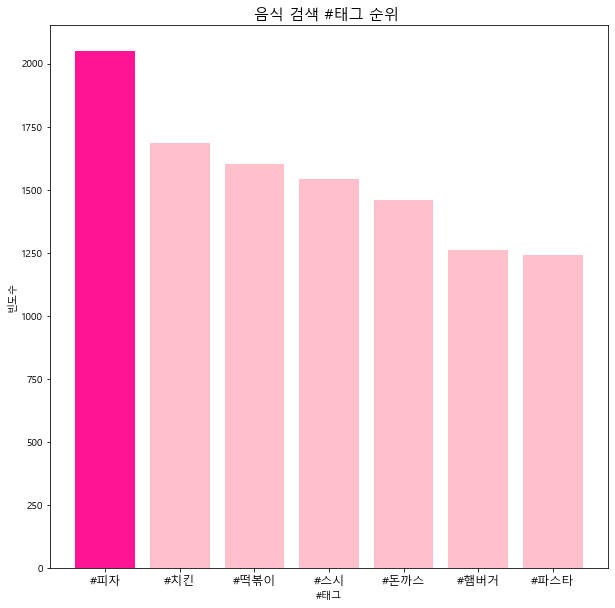

In [134]:
label = food[0]
index = np.arange(len(label))
colors = ['deeppink','pink','pink','pink','pink','pink','pink']

plt.figure(figsize = (10,10))
plt.bar(index, food[1][0:10],
       color=colors)

plt.title('음식 검색 #태그 순위 ', fontsize=15)
plt.xlabel('#태그', fontsize=10)
plt.ylabel('빈도수', fontsize=10)
plt.xticks(index, label, fontsize=12)